# Question-a
- We assume x(t) to be a 3*1 matrix with each row representing a coordinate in 3D space.
- If x(t) is a gaussian random process, then all the rows of x(t) are gaussian.
- The filters y(t) and z(t) are just a combination of x(t)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import matplotlib.colors as colors

## x(t) filter

### Cross-covariance matrix of x(t) filter

In [2]:
A = [[0.5,0,0,0,0], [0.5, 0.5, 0, 0, 0], [0, 0.5, 0.5, 0, 0], [0, 0, 0.5, 0.5, 0], [0, 0, 0, 0.5, 0.5]]

matrix = np.dot(A, np.transpose(A))

print(matrix)


[[0.25 0.25 0.   0.   0.  ]
 [0.25 0.5  0.25 0.   0.  ]
 [0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.25 0.5  0.25]
 [0.   0.   0.   0.25 0.5 ]]


### Plotting x(t)

[[0.25 0.25 0.  ]
 [0.25 0.5  0.25]
 [0.   0.25 0.5 ]]


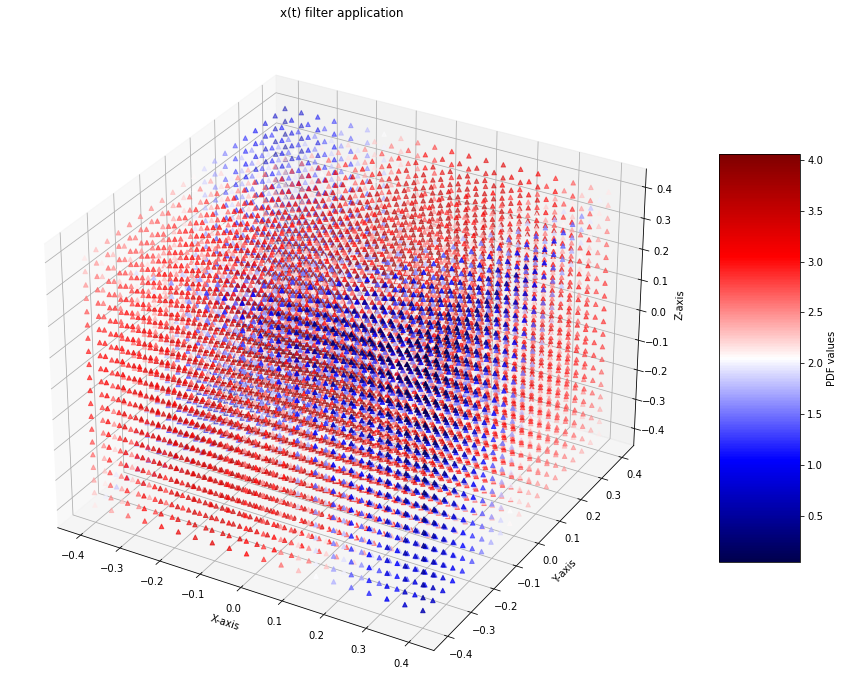

In [3]:
A = [[0.5, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0.5]]
matrix = np.dot(A, np.transpose(A))
print(matrix)
mean = 0
Y = lambda x,y,z : np.transpose([[x-mean, y-mean, z-mean]])

#Inverse of covariance matrix
Inv = np.linalg.inv(matrix)
f_x = []


x = np.linspace(-0.4, 0.4, 20)
y = np.linspace(-0.4, 0.4, 20)
z = np.linspace(-0.4, 0.4, 20)
x_1 = []
y_1 = []
z_1 = []

for d in x:
    for e in y:
        for f in z:
            x_1.append(d)
            y_1.append(e)
            z_1.append(f)
            t = np.dot(np.transpose(Y(d,e,f)), Inv)
            a = np.dot(t, Y(d,e,f))
            gauss = ((np.e)**(-a[0][0]/2))/(((2*np.pi)**(3/2))*(np.linalg.det(np.array(matrix))))
            f_x.append(gauss)

my_cmap = plt.get_cmap('seismic')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# creating the heatmap
img = ax.scatter3D(x_1, y_1, z_1,c=f_x, cmap=my_cmap, marker='^')
fig.colorbar(img, ax = ax, shrink = 0.5, aspect = 5, label="PDF values")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('x(t) filter application');

### Analysis of the graph
- The graph is oriented across y=x direction and is elongated along z

## y(t) filter

### Cross-covariance matrix for y(t)

In [4]:
A = [[1,0,0,0,0], [-1, 1, 0, 0, 0], [0, -1, 1, 0, 0], [0, 0, -1, 1, 0], [0, 0, 0, -1, 1]]

matrix = np.dot(A, np.transpose(A))

print(matrix)


[[ 1 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  2]]


### Plotting y(t)

[[ 1 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


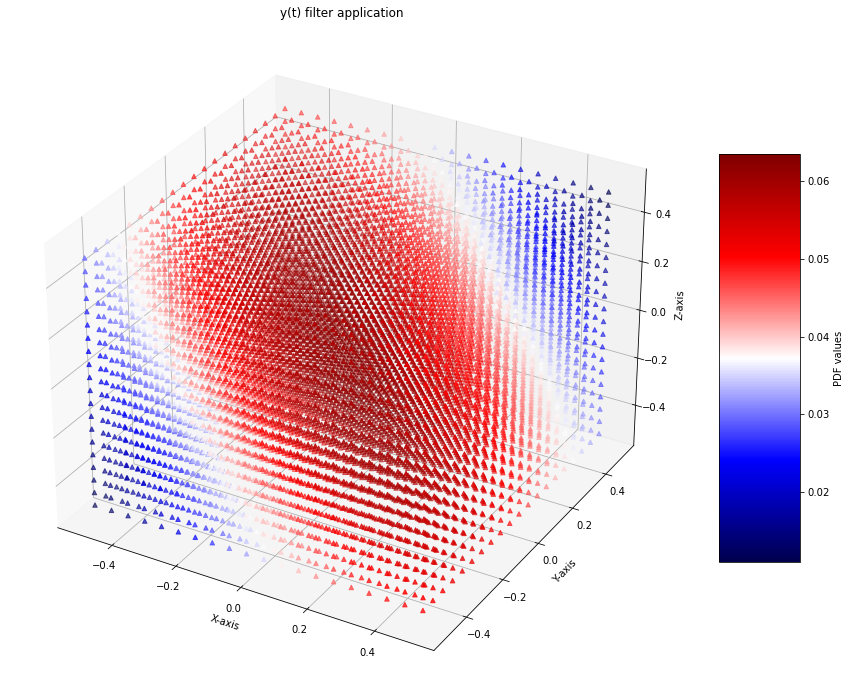

In [5]:
A = [[1, 0, 0], [-1, 1, 0], [0, -1, 1]]
matrix = np.dot(A, np.transpose(A))
print(matrix)
Y = lambda x,y,z : np.transpose([[x-mean, y-mean, z-mean]])

#Inverse of covariance matrix
Inv = np.linalg.inv(matrix)
f_x = []


x = np.linspace(-0.5, 0.5, 20)
y = np.linspace(-0.5, 0.5, 20)
z = np.linspace(-0.5, 0.5, 20)
x_1 = []
y_1 = []
z_1 = []

for d in x:
    for e in y:
        for f in z:
            x_1.append(d)
            y_1.append(e)
            z_1.append(f)
            t = np.dot(np.transpose(Y(d,e,f)), Inv)
            a = np.dot(t, Y(d,e,f))
            gauss = ((np.e)**(-a[0][0]/2))/(((2*np.pi)**(3/2))*(np.linalg.det(np.array(matrix))))
            f_x.append(gauss)

my_cmap = plt.get_cmap('seismic')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# creating the heatmap
img = ax.scatter3D(x_1, y_1, z_1,c=f_x, cmap=my_cmap, marker='^')
fig.colorbar(img, ax = ax, shrink = 0.5, aspect = 5, label="PDF values")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('y(t) filter application');

### Analysis of the graph
- The graph is oriented along x+z = c and is elongated along y-axis.

## Question-b


In [6]:
x = np.linspace(1, 1000, 1000)
y = []
p = 0.3
bernoulli = lambda m:((1-p)**(m-1))*p
for a in x:
    y.append(bernoulli(a))

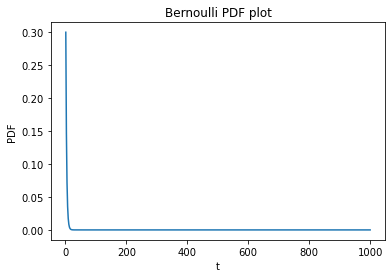

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_title("Bernoulli PDF plot")
ax.set_xlabel('t')
ax.set_ylabel('PDF');

## Question-c
- Let's assume that the particle can either move 1 step forward or 1 step backward(+1 for forward step and -1 for backward step)
- If the probability of getting +1 coordinate is p, the probability of getting +1 coordinate after m trials is
  ((1-p)^(m-1))*p and the expected coordinate will be ((-1)*(m-1)) + 1 = 2-m 

In [8]:
x = np.linspace(1, 10000, 10000)
x_t = []
p = 0.46
bernoulli = lambda m:((1-p)**(m-1))*p
for a in x:
    x_t.append((2-a)*bernoulli(a))
y = []
sum_x = 0
for i in range(0, 10000):
    sum_x += x_t[i]
    y.append(sum_x)

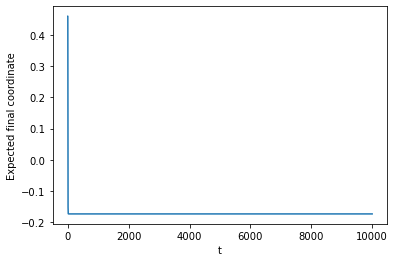

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_xlabel('t')
ax.set_ylabel('Expected final coordinate');

In [10]:
x = np.linspace(1, 10000, 10000)
x_t = []
p = 0.5
bernoulli = lambda m:((1-p)**(m-1))*p
for a in x:
    x_t.append((2-a)*bernoulli(a))
y = []
sum_x = 0
for i in range(0, 10000):
    sum_x += x_t[i]
    y.append(sum_x)

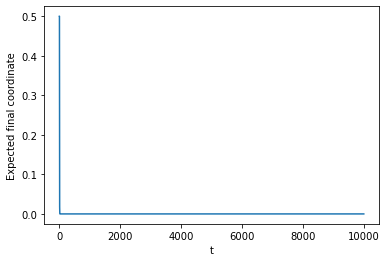

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_xlabel('t')
ax.set_ylabel('Expected final coordinate');

In [12]:
x = np.linspace(1, 10000, 10000)
x_t = []
p = 0.54
bernoulli = lambda m:((1-p)**(m-1))*p
for a in x:
    x_t.append((2-a)*bernoulli(a))
y = []
sum_x = 0
for i in range(0, 10000):
    sum_x += x_t[i]
    y.append(sum_x)

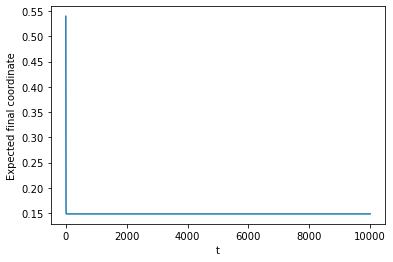

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y);
ax.set_xlabel('t')
ax.set_ylabel('Expected final coordinate');

## Question-d

In [14]:
#Scale = (1/lambda)
arr = np.zeros(20)
for i in range(1, 20):
    arr[i] = arr[i-1] + (np.random.exponential(scale = 2.3))

In [15]:
dist = []
for i in range(1, 20):
    dist.append(arr[i]-arr[i-1])

### Histogram of difference in exponentials

array([2, 3, 3, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

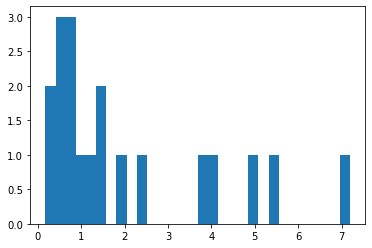

In [16]:
counts, bins = np.histogram(dist, bins=30)
plt.hist(dist, bins = 30);
counts

In [17]:
counts = list(counts)
bins = list(bins)
for i in range(0, len(counts)):
    counts[i] = counts[i]/20

In [18]:
pdf = counts/(bins[1]-bins[0])

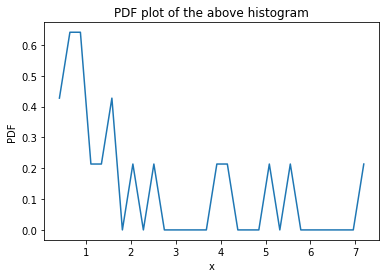

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("PDF")
ax.set_title("PDF plot of the above histogram")
ax.plot(bins[1:len(bins)], pdf);

### Analysis of the graph
- Here, the mean(highest number of events) is at x = (1/2.3) = 0.43 where lambda of exponential was 1/2.3.
- Also, lambda*t = 0.43*10 ~ 3 the highest frequency(or mean).
- Therefore, the above plotted histogram and PDF graph correspond to a poisson distribution.